**Importiere die notwendigen Packages**

In [1]:
import pandas as pd
import pivottablejs
from pivottablejs import pivot_ui
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from datetime import datetime
import geopandas as gpd
import folium 



Definiere Settings. Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen), 

In [2]:
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

Importiere einen Datensatz von der **DWH_INT** Dropzone.

- Beachte dabei die Notation des Pfades...
- Definiere mal aktuell noch keine weiteren Parameter beim Import

**Dataset auf INTEG Datenkatalog**: https://data.integ.stadt-zuerich.ch/dataset/int_dwh_bev_vornamen_baby_od3700

In [3]:
# Filepath
fp = r"//szh.loc/ssz/applikationen/OGD_Dropzone/DWH/bev_vornamen_baby_OD3700/BEV370OD3700.csv"
#AUf INTEG
#fp = r"//szh.loc/ssz/applikationen/OGD_Dropzone/INT_DWH/bev_vornamen_baby_OD3700/BEV370OD3700.csv"


# Read the data
data2betested = pd.read_csv(
    fp, 
    sep=',',
   #usecols=[0,1,2,3,4,6],
   #names=['stationid','year','month','avgtemp','latitude','longitude','elevation','station','countryid','country'],
   #skiprows=1,
   # parse_dates=[0],
    parse_dates=True,
    #date_parser=lambda x: pd.to_datetime(x, format="%Y"), 
    #index_col="date_time",
    low_memory=False    
    )

In der Folge ein paar erste Tests:

In [4]:
type(data2betested)

pandas.core.frame.DataFrame

 - 1) Zeige eine kurze Vorschau der importierten Daten
 - 2) Weise die Datentypen aus
 - 3) Zeige die Shape (Umfang) des Datensatzes an

In [5]:
data2betested.head(3)

,StichtagDatJahr,Vorname,SexLang,AnzGebuWir
0,1993,Abarna,weiblich,1
1,1993,Abetare,weiblich,1
2,1993,Abir,weiblich,1


In [6]:
data2betested.dtypes

StichtagDatJahr     int64
Vorname            object
SexLang            object
AnzGebuWir          int64
dtype: object

In [7]:
data2betested.shape

(60412, 4)

Beschreibe einzelne Attribute

In [8]:
data2betested.describe()

,StichtagDatJahr,AnzGebuWir
count,60412,60412
mean,2007,2
std,8,2
min,1993,1
25%,2001,1
50%,2008,1
75%,2014,2
max,2020,32


Wie viele Nullwerte gibt es im Datensatz?

In [9]:
data2betested.isnull().sum()

StichtagDatJahr    0
Vorname            0
SexLang            0
AnzGebuWir         0
dtype: int64

Wandle die Spalte Jahr von Int zu **Datetime** um. Dies wird in den meisten Grafiken so benötigt.

In [10]:
#data2betested['Jahrgang']=pd.to_datetime(data2betested['Jahrgang'], format='%Y')

#TO DO --> setze das Datum auf den 31.12. der Jahres.
#test=data2betested[['StichtagDatJahr']].date().replace(month=12, day=31)

#data2betested

Bereite die Daten für die Grafik unten vor

In [11]:
grp_jahr = data2betested.groupby("StichtagDatJahr")

len(grp_jahr)
grp_jahr.head()



,StichtagDatJahr,Vorname,SexLang,AnzGebuWir
0,1993,Abarna,weiblich,1
1,1993,Abetare,weiblich,1
2,1993,Abir,weiblich,1
3,1993,Abirami,weiblich,1
4,1993,Adelaide,weiblich,1
...,...,...,...,...
28724,2020,Aarna,weiblich,1
28725,2020,Aaruja,weiblich,1
28726,2020,Aavni,weiblich,1
28727,2020,Abby,weiblich,1


In [12]:
for key, group in grp_jahr:
    print(key, len(group))


1993 1651
1994 1779
1995 1774
1996 1854
1997 1804
1998 1921
1999 1932
2000 2003
2001 1942
2002 2024
2003 2061
2004 2062
2005 2110
2006 2239
2007 2149
2008 2243
2009 2332
2010 2244
2011 2361
2012 2358
2013 2418
2014 2505
2015 2504
2016 2457
2017 2470
2018 2357
2019 2413
2020 2445


In [13]:
#myJahr = "2019-01-01"
#aktuellesJahr=Jahre.get_group(myJahr)   
#aktuellesJahr

**Selektionen und Aggregationen**

Check this [Doku](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [14]:
med_gebjahr_sex = data2betested.groupby(['StichtagDatJahr','SexLang'])[['AnzGebuWir']].agg('median')
anz_vn_gebjahr_sex = data2betested.groupby(['StichtagDatJahr', 'SexLang','Vorname' ])[['AnzGebuWir']].sum()
anz_vn_sex= data2betested.groupby(['SexLang','Vorname' ])[['AnzGebuWir']].sum()

# produces Pandas Series
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])['AnzBestWir'].sum()
# Produces Pandas DataFrame
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])[['AnzBestWir']].sum()



 

Sortiere einen DataFrame

In [15]:
anz_vn_gebjahr_sex.sort_values(by='AnzGebuWir', ascending=False, na_position='first')

AnzGebuWir
StichtagDatJahr SexLang  Vorname            
2014            weiblich Emma             32
2013            weiblich Anna             31
1993            weiblich Laura            31
1998            weiblich Laura            31
2016            männlich Louis            30
...                                      ...
2005            männlich Henri             1
                         Hersch            1
                         Hervé             1
                         Heschy            1
2020            weiblich Íris              1

[60412 rows x 1 columns]

Sortiere eine «Series»

In [16]:
# Diese Aggregation führt zu einem DataFrame. Dieser muss wie vorher gezeigt sortiert werden.
# anz_vn_sex= data2betested.groupby(['SexLang','Vorname' ])[['AnzGebuWir']].sum()

#Folgende Aggregation führt zu einer Series, die anders als ein DF sortiert wird:
anz_vn_sex= data2betested.groupby(['SexLang','Vorname' ])['AnzGebuWir'].sum()

anz_vn_sex.sort_values(ascending=False, inplace=True, na_position='first')
anz_vn_sex


SexLang   Vorname  
männlich  David        577
weiblich  Anna         561
          Laura        475
          Sara         438
männlich  Noah         422
                      ... 
          Shreyas        1
          Shrivatsa      1
          Shuaib         1
          Shuajb         1
weiblich  Ümü            1
Name: AnzGebuWir, Length: 20957, dtype: int64

**Einfache Visualisierungen zur Plausi**

Exploriere die Daten mit Pivottable.JS

In [17]:
from pivottablejs import pivot_ui

pivot_ui(data2betested)

**Liniendiagramm Mit Altair**

[Link zur Altair-Doku](https://altair-viz.github.io/gallery/multiline_highlight.html)

Füge eine Variablen hinzu, welche den ersten, den zweiten und die ersten beiden Buchstaben des Namens angeben.

In [18]:
data2betested["FirstLetter"]= data2betested["Vorname"].astype(str).str[0]
data2betested["SecondLetter"]= data2betested["Vorname"].astype(str).str[1]
data2betested["FirstTwoLetters"]= data2betested["Vorname"].str.slice(stop=2)
data2betested.sort_values(by='AnzGebuWir', ascending=False, inplace=True, na_position='first')
#.str[0]
#data2betested["StartLetter"]= data2betested["Vorname"].str.extract(r"(\d{2})")
print(data2betested)

       StichtagDatJahr  Vorname   SexLang  AnzGebuWir FirstLetter SecondLetter FirstTwoLetters
21853             2014     Emma  weiblich          32           E            m              Em
20412             2013     Anna  weiblich          31           A            n              An
424               1993    Laura  weiblich          31           L            a              La
4890              1998    Laura  weiblich          31           L            a              La
54937             2016    Louis  männlich          30           L            o              Lo
...                ...      ...       ...         ...         ...          ...             ...
23283             2015     Kali  weiblich           1           K            a              Ka
23284             2015  Kamille  weiblich           1           K            a              Ka
23285             2015    Kaona  weiblich           1           K            a              Ka
23286             2015    Karen  weiblich         

In [19]:
mySelection = data2betested[(data2betested.StichtagDatJahr>2011) & (data2betested.StichtagDatJahr<2014) & (data2betested.SexLang=='weiblich')]
agg_mySelection= mySelection.groupby(['Vorname', 'SexLang' ])[['AnzGebuWir']].sum()
agg_mySelection.sort_values(by='AnzGebuWir', ascending=False, inplace=True)
agg_mySelection.head()
#mySelection.head()
#agg_mySelection.dtypes


,,AnzGebuWir
Vorname,SexLang,
Anna,weiblich,60
Emma,weiblich,45
Julia,weiblich,41
Sara,weiblich,37
Elin,weiblich,36


In [20]:
mySelection


,StichtagDatJahr,Vorname,SexLang,AnzGebuWir,FirstLetter,SecondLetter,FirstTwoLetters
20412,2013,Anna,weiblich,31,A,n,An
19274,2012,Anna,weiblich,29,A,n,An
19487,2012,Emma,weiblich,24,E,m,Em
21299,2013,Sara,weiblich,23,S,a,Sa
20824,2013,Julia,weiblich,21,J,u,Ju
...,...,...,...,...,...,...,...
19383,2012,Chrisbely,weiblich,1,C,h,Ch
19384,2012,Christiana,weiblich,1,C,h,Ch
19385,2012,Christina,weiblich,1,C,h,Ch
19386,2012,Ciara,weiblich,1,C,i,Ci


**Erster Test mit Altair-Liniengrafik**

[Link](https://altair-viz.github.io/gallery/multiline_highlight.html)

In [21]:
myGraphic=data2betested[ (data2betested.StichtagDatJahr>2018) & (data2betested.FirstTwoLetters=="La") | (data2betested.FirstTwoLetters=="Lo") & (data2betested.SexLang=="weiblich")]
# --> Weshalb wir die Bedingung auf die Jahre nicht übernommen? 
# --> so würde es in einem 2. Schritt gehen. 
# myGraphic=myGraphicPart[ (myGraphicPart.StichtagDatJahr>2012)]



In [22]:
# df_statzonen = df_statzonen[(df_statzonen.knr>0) & (df_statzonen.qname!="Hirslanden")]
#aktuellesJahr[[aktuellesJahr.KreisSort =7]])


highlight = alt.selection(type='single', on='mouseover',
                          fields=['symbol'], nearest=True)
#x='date:StichtagDatJahr',
base = alt.Chart(myGraphic).encode(
    x='StichtagDatJahr:N',
    y='AnzGebuWir',
    color='Vorname'
)

points = base.mark_circle().encode(
    opacity=alt.value(0.75)
).add_selection(
    highlight
).properties(
    width=900 , height=400
)
lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1.5), alt.value(4))
).interactive()

points + lines

alt.LayerChart(...)

In [23]:
alt.Chart(myGraphic).mark_circle(size=60).encode(
    x='Vorname',
    y='AnzGebuWir',
    color='StichtagDatJahr',
    tooltip=['StichtagDatJahr', 'Vorname', 'FirstTwoLetters','AnzGebuWir']
).interactive() # this makes the axes interactive: now you can zoom & pan



alt.Chart(...)

In [24]:
myGraphic



,StichtagDatJahr,Vorname,SexLang,AnzGebuWir,FirstLetter,SecondLetter,FirstTwoLetters
28124,2019,Lara,weiblich,20,L,a,La
28126,2019,Laura,weiblich,16,L,a,La
17498,2010,Lorena,weiblich,11,L,o,Lo
29300,2020,Lara,weiblich,10,L,a,La
25827,2017,Lou,weiblich,9,L,o,Lo
...,...,...,...,...,...,...,...
23400,2015,Lora,weiblich,1,L,o,Lo
23402,2015,Loresa,weiblich,1,L,o,Lo
23403,2015,Lorine,weiblich,1,L,o,Lo
23405,2015,Lotte,weiblich,1,L,o,Lo


In [25]:
#Siehe dazu Anleitung unter: https://altair-viz.github.io/gallery/scatter_matrix.html
#Daten zu den Bsp. unter:https://altair-viz.github.io/gallery/index.html.

alt.Chart(myGraphic).mark_circle().encode(
    alt.X(alt.repeat("column"), type='ordinal'), #es gibt folgende Typen (quantitative, ordinal, nominal, temporal)
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Vorname'
).properties(
    width=150,
    height=150
).repeat(
    column=['Vorname', 'FirstLetter', 'FirstTwoLetters'],
    row=['StichtagDatJahr', 'AnzGebuWir']
).interactive()

alt.RepeatChart(...)

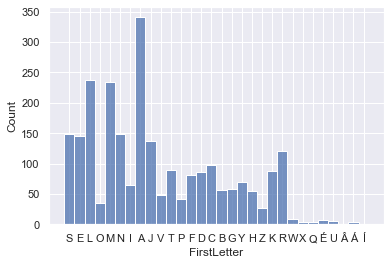

In [26]:
import seaborn as sns
sns.set(style="darkgrid")
sns.histplot(data=data2betested[(data2betested.StichtagDatJahr==2020)] , x="FirstLetter") #, y="SexLang")
plt.show();

Test: Choroplethenkarte

**Test: Choroplethenkarte**
Importiere die Geodaten als GeoJSON

In [27]:
# Read abt. Geopandas https://geopandas.org/docs/user_guide/io.html
# Filepath statzonen
input_statzonen = r"//szh.loc/ssz/data/GIS/Daten/Vektor/_aktuell/stzh.adm_statzonen_map.json"
df_statzonen = gpd.read_file(input_statzonen)
df_statzonen.head(2)


,objectid,objid,stznr,stzname,qnr,qname,knr,kname,geometry
0,1,154,7303,Hegibach,73,Hirslanden,7,Kreis 7,"POLYGON ((8.55670 47.36407, 8.55670 47.36406, ..."
1,2,89,7302,Klus,73,Hirslanden,7,Kreis 7,"POLYGON ((8.57281 47.35806, 8.57274 47.35804, ..."


Joine die importierten statistischen Daten des aktuellen Jahres zum Geodatensatz:

*Siehe dazu Doku zu [Geopandas](https://geopandas.org/docs/user_guide/mergingdata.html)*

#Link https://automating-gis-processes.github.io/site/notebooks/L5/interactive-map-folium.html

# Create a Map instance
m = folium.Map(location=[60.25, 24.8], tiles = 'cartodbpositron', zoom_start=10, control_scale=True)

# Plot a choropleth map
# Notice: 'geoid' column that we created earlier needs to be assigned always as the first column
folium.Choropleth(
    geo_data=data,
    name='Population in 2018',
    data=data,
    columns=['geoid', 'pop18'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    line_color='white',
    line_weight=0,
    highlight=False,
    smooth_factor=1.0,
    #threshold_scale=[100, 250, 500, 1000, 2000],
    legend_name= 'Population in Helsinki').add_to(m)

#Show map
m

Noch zu prüfen, folgendes schöne Beispiel: https://docs.bokeh.org/en/latest/docs/user_guide/interaction/legends.html

Konkrete Beispiele von Bookeh in Jupyter NB: https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html